In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

# Reading File

In [2]:
df = pd.read_csv("energy consumption.csv")

In [3]:
df.head(15)

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133
5,06/1939,3.5650
6,07/1939,3.5650
7,08/1939,3.6167
8,09/1939,3.7200
9,10/1939,3.7200


In [4]:
df.shape

(969, 2)

In [5]:
df.isna().sum()

DATE            0
ENERGY_INDEX    0
dtype: int64

# Preprocessing

In [6]:
df.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

In [7]:
df["DATE"] = pd.to_datetime(df['DATE'],format='%m/%Y')
df.index = df["DATE"]

In [8]:
df.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


In [9]:
df.dtypes

DATE            datetime64[ns]
ENERGY_INDEX           float64
dtype: object

In [10]:
df["DATE"].max(), df["DATE"].min()

(Timestamp('2019-09-01 00:00:00'), Timestamp('1939-01-01 00:00:00'))

In [11]:
df["DATE"].max()-df["DATE"].min()

Timedelta('29463 days 00:00:00')

# EDA

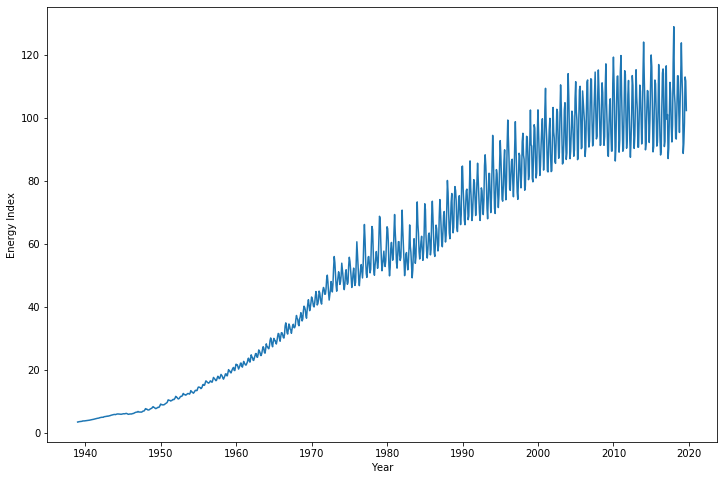

In [12]:
plt.figure(figsize=(12,8))

plt.plot(df["DATE"], df['ENERGY_INDEX'])
plt.xlabel("Year")
plt.ylabel("Energy Index")
plt.show()

In [13]:
df['DATE'].dt.year.head()

DATE
1939-01-01    1939
1939-02-01    1939
1939-03-01    1939
1939-04-01    1939
1939-05-01    1939
Name: DATE, dtype: int64

In [14]:
df['DATE'].dt.day.head()

DATE
1939-01-01    1
1939-02-01    1
1939-03-01    1
1939-04-01    1
1939-05-01    1
Name: DATE, dtype: int64

In [15]:
df['DATE'].dt.dayofweek.head()

DATE
1939-01-01    6
1939-02-01    2
1939-03-01    2
1939-04-01    5
1939-05-01    0
Name: DATE, dtype: int64

### Adding Features

In [16]:
df_feat = pd.DataFrame({"year": df['DATE'].dt.year,
                          "month": df['DATE'].dt.month,
                          "day": df['DATE'].dt.day,
                          "dayofyear": df['DATE'].dt.dayofyear,
                          "week": df['DATE'].dt.week,
                          "weekday": df['DATE'].dt.dayofweek,
                          "quarter": df['DATE'].dt.quarter,
                         })
df_feat.head()

,year,month,day,dayofyear,week,weekday,quarter
DATE,,,,,,,
1939-01-01,1939,1,1,1,52,6,1
1939-02-01,1939,2,1,32,5,2,1
1939-03-01,1939,3,1,60,9,2,1
1939-04-01,1939,4,1,91,13,5,2
1939-05-01,1939,5,1,121,18,0,2


In [17]:
complete_data = pd.concat([df_feat, df['ENERGY_INDEX']], axis=1)
complete_data.head()

,year,month,day,dayofyear,week,weekday,quarter,ENERGY_INDEX
DATE,,,,,,,,
1939-01-01,1939,1,1,1,52,6,1,3.3842
1939-02-01,1939,2,1,32,5,2,1,3.4100
1939-03-01,1939,3,1,60,9,2,1,3.4875
1939-04-01,1939,4,1,91,13,5,2,3.5133
1939-05-01,1939,5,1,121,18,0,2,3.5133


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Month Trend')

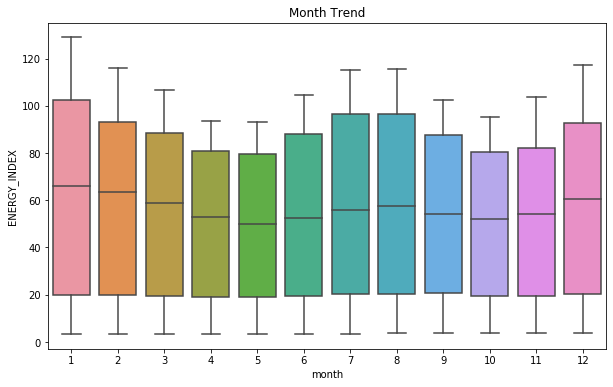

In [18]:
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['ENERGY_INDEX'])
plt.title('Month Trend')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Quarter Trend')

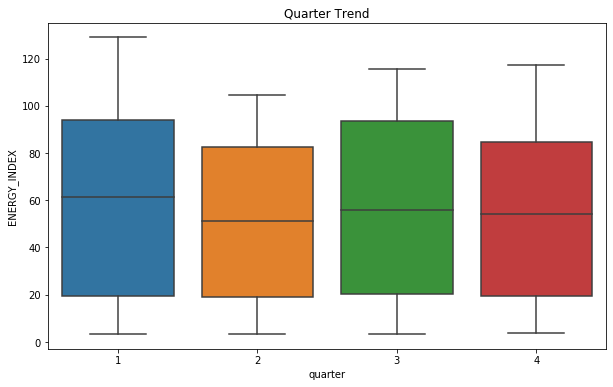

In [19]:
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['quarter'], y=complete_data['ENERGY_INDEX'])
plt.title('Quarter Trend')

#### Average Energy Index over the years

In [20]:
year_average = pd.DataFrame(complete_data.groupby('year')['ENERGY_INDEX'].mean())
year_average

,ENERGY_INDEX
year,
1939,3.582217
1940,3.950358
1941,4.456242
1942,5.005225
1943,5.530525
1944,5.885725
1945,5.986908
1946,6.228008
1947,6.729625


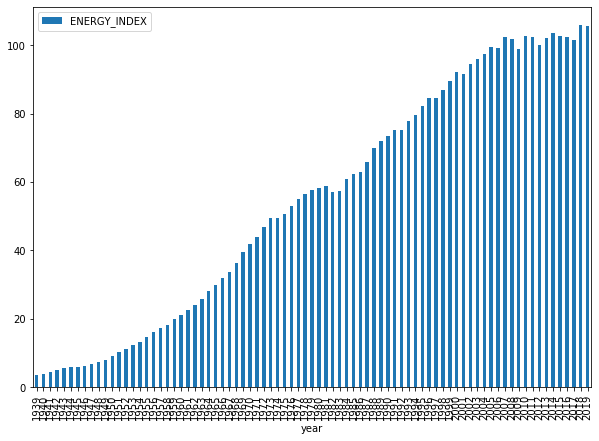

In [21]:
year_average = pd.DataFrame(year_average)
year_average
year_average.plot(kind='bar', figsize=(10,7))

#### Average for quarters


In [22]:
quarter_average = pd.DataFrame(complete_data.groupby('quarter')['ENERGY_INDEX'].mean())
quarter_average

,ENERGY_INDEX
quarter,
1,58.127037
2,50.794960
3,56.527812
4,53.162160


#### Monthly Average

In [23]:
month_average = pd.DataFrame(complete_data.groupby('month')['ENERGY_INDEX'].mean())
month_average

,ENERGY_INDEX
month,
1,61.887400
2,57.918920
3,54.574790
4,49.644065
5,49.306969
6,53.433847
7,57.625747
8,58.164114
9,53.793575


# Splitting data

In [24]:
df.shape

(969, 2)

In [25]:
len_train_data = int(df.shape[0]*0.7)
len_train_data

678

In [26]:
len_train_data

678

In [27]:
train_data = df[:len_train_data]
valid_data = df[len_train_data:]

In [28]:
train_data.tail()

,DATE,ENERGY_INDEX
DATE,,
1995-02-01,1995-02-01,87.6670
1995-03-01,1995-03-01,81.5205
1995-04-01,1995-04-01,74.0457
1995-05-01,1995-05-01,73.5003
1995-06-01,1995-06-01,78.5503


In [29]:
valid_data.head()

,DATE,ENERGY_INDEX
DATE,,
1995-07-01,1995-07-01,86.2425
1995-08-01,1995-08-01,89.8063
1995-09-01,1995-09-01,78.7442
1995-10-01,1995-10-01,73.9353
1995-11-01,1995-11-01,79.8903


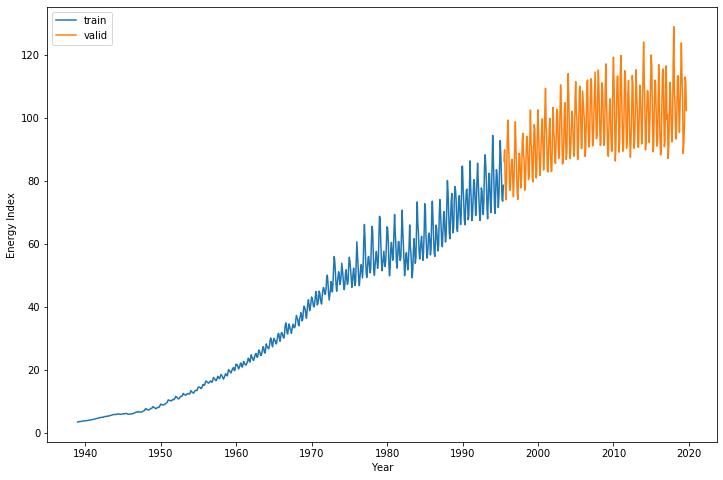

In [30]:
plt.figure(figsize=(12,8))

plt.plot(train_data["DATE"], train_data['ENERGY_INDEX'], label="train")
plt.plot(valid_data["DATE"], valid_data['ENERGY_INDEX'], label="valid")
plt.xlabel("Year")
plt.legend()
plt.ylabel("Energy Index")
plt.show()

# Simple Exponential Smoothing

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [32]:
model = SimpleExpSmoothing(np.asarray(train_data['ENERGY_INDEX']))
model = model.fit(smoothing_level=0.7,initial_level=3,optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [33]:
model.params

{'smoothing_level': 0.7,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 3.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

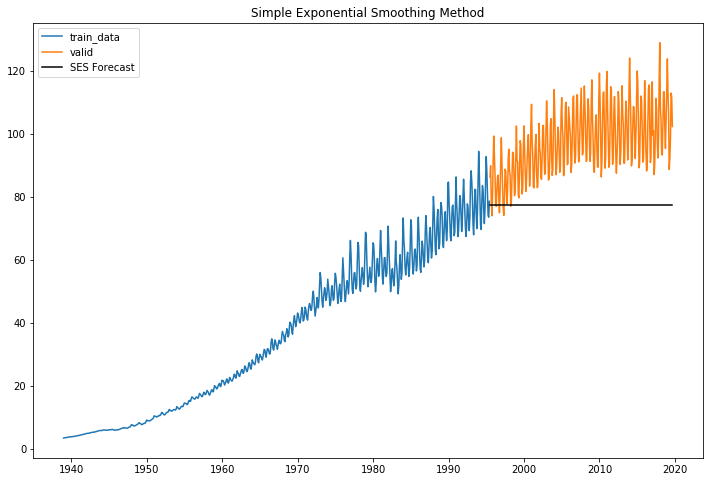

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast', color="black")
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

### RMSE

In [35]:

rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 22.804039076789998


# Double Exponential Smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [37]:
#train_data["ENERGY_INDEX"] = train_data["ENERGY_INDEX"].astype("double") 
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']), trend='add')
model = model.fit(smoothing_level=0.7, smoothing_slope=0.001, initial_slope =0.01)  

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [38]:
model.params


{'smoothing_level': 0.7,
 'smoothing_slope': 0.001,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 3.318281073349987,
 'initial_slope': 0.01,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

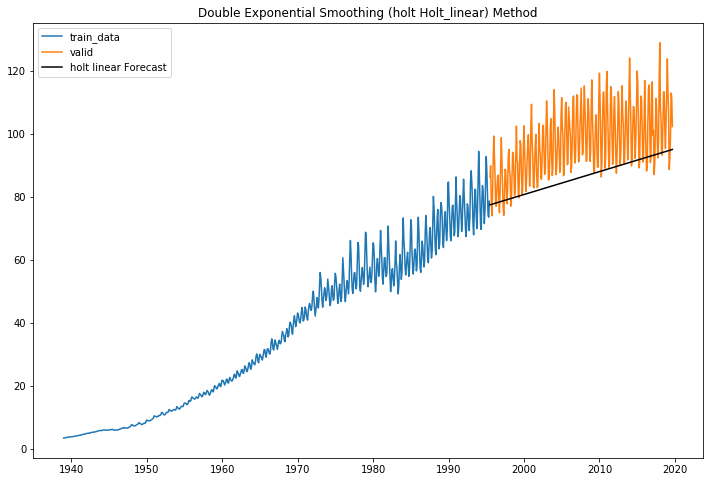

In [39]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast', color="black")
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

### RMSE 

In [40]:
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 14.406818111127258


# Holt Winters (TES)

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing

In [42]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='add',)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.01, smoothing_seasonal=0.8) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [43]:
model.params

{'smoothing_level': 0.4,
 'smoothing_slope': 0.01,
 'smoothing_seasonal': 0.8,
 'damping_slope': nan,
 'initial_level': 36.194435051546385,
 'initial_slope': 0.03479591836734695,
 'initial_seasons': array([-32.81023505, -32.78443505, -32.70693505, -32.68113505,
        -32.68113505, -32.62943505, -32.62943505]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

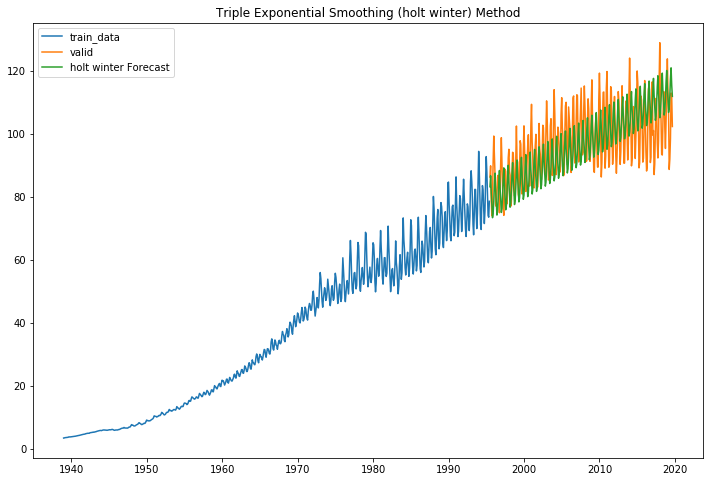

In [44]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

### RMSE 

In [45]:
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 11.018814455273436


# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.model_selection import TimeSeriesSplit
time_series_cv = TimeSeriesSplit(n_splits=5)

In [48]:
model = LinearRegression(normalize=True)

In [49]:
i = 0
for train_index, test_index in time_series_cv.split(df):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])
    
    x_train = (complete_data[train_index[0]:train_index[-1]]).drop('ENERGY_INDEX', axis=1)
    y_train = (complete_data[train_index[0]:train_index[-1]]['ENERGY_INDEX'])
    x_valid = (complete_data[test_index[0]:test_index[-1]]).drop('ENERGY_INDEX', axis=1)
    y_valid = (complete_data[test_index[0]:test_index[-1]]['ENERGY_INDEX'])
    
    print('Model training on set', i+1)
    model.fit(x_train,y_train)
    preds_valid = model.predict(x_valid)
    rmse = sqrt(mean_squared_error(y_valid, preds_valid))
    print('The RMSE value is', rmse)
    i=i+1
print('----- ----- ----')

----- ----- ----
TRAIN: 0 to 163
TEST: 164 to 324
Model training on set 1
The RMSE value is 7.273687113651323
----- ----- ----
TRAIN: 0 to 324
TEST: 325 to 485
Model training on set 2
The RMSE value is 13.701492363786329
----- ----- ----
TRAIN: 0 to 485
TEST: 486 to 646
Model training on set 3
The RMSE value is 5.686852241901744
----- ----- ----
TRAIN: 0 to 646
TEST: 647 to 807
Model training on set 4
The RMSE value is 8.453044428081784
----- ----- ----
TRAIN: 0 to 807
TEST: 808 to 968
Model training on set 5
The RMSE value is 11.775938437526955
----- ----- ----


# Prediction for next 3 years

In [50]:
years = [2023, 2024, 2025]

In [51]:
for year in years:
    print(str(year)+":", model.predict([[year, 1, 1, 1, 1, 1, 1]]))

2023: [125.62044863]
2024: [127.17754048]
2025: [128.73463234]


# Stationarity test

In [52]:
from statsmodels.tsa.stattools import adfuller, kpss

In [53]:
def adf_test(timeseries):

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [54]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [55]:
adf_test(train_data['ENERGY_INDEX'])

Results of Dickey-Fuller Test:
Test Statistic                   1.672144
p-value                          0.998059
#Lags Used                      13.000000
Number of Observations Used    664.000000
Critical Value (1%)             -3.440237
Critical Value (5%)             -2.865903
Critical Value (10%)            -2.569093
dtype: float64


In [56]:
kpss_test(train_data['ENERGY_INDEX'])

Results of KPSS Test:
Test Statistic            3.314762
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Here test statistic is > than critical. Hence series is not stationary**

# Making series staitionary

In [57]:
train_data['en_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

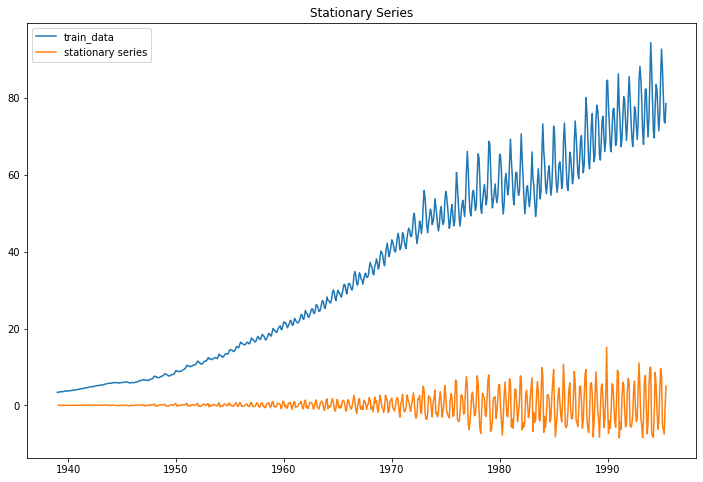

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['en_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [59]:
train_data['en_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['en_log_diff'] = train_data['en_log'] - train_data['en_log'].shift(1)

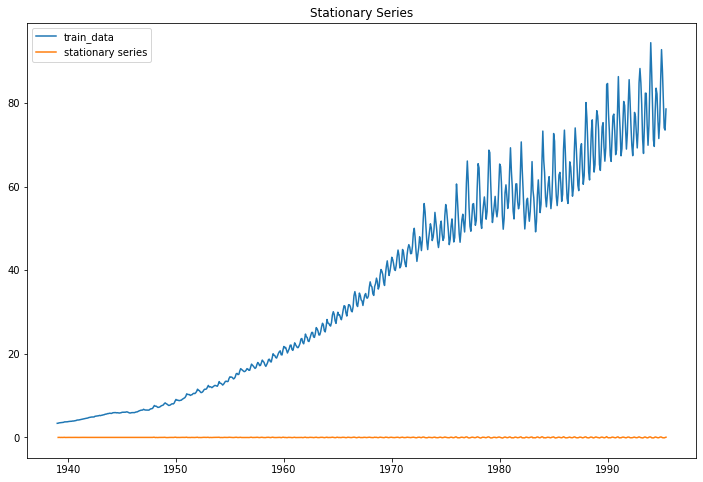

In [60]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['en_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

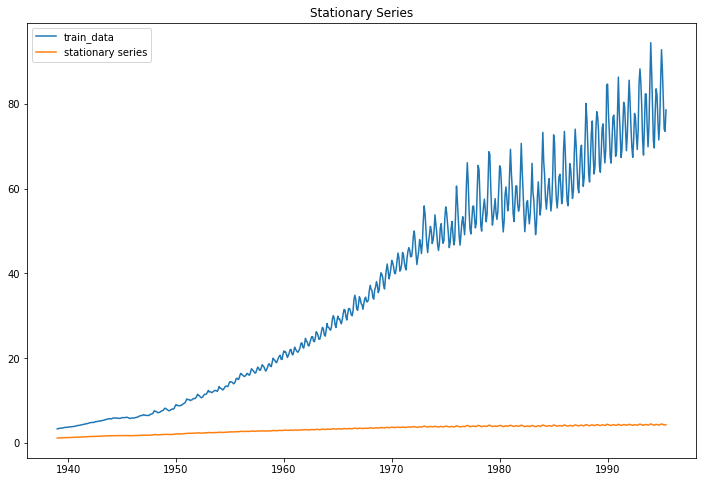

In [61]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['en_log'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [62]:
adf_test(train_data['en_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.386267e+00
p-value                        8.221466e-11
#Lags Used                     1.400000e+01
Number of Observations Used    6.620000e+02
Critical Value (1%)           -3.440267e+00
Critical Value (5%)           -2.865916e+00
Critical Value (10%)          -2.569100e+00
dtype: float64


In [63]:
kpss_test(train_data['en_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.042036
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [64]:
adf_test(train_data['en_log'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -4.321980
p-value                          0.000407
#Lags Used                      14.000000
Number of Observations Used    663.000000
Critical Value (1%)             -3.440252
Critical Value (5%)             -2.865909
Critical Value (10%)            -2.569097
dtype: float64


In [65]:
kpss_test(train_data['en_log'].dropna())

Results of KPSS Test:
Test Statistic            3.196271
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [66]:
adf_test(train_data['en_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.923229
p-value                          0.001870
#Lags Used                      18.000000
Number of Observations Used    658.000000
Critical Value (1%)             -3.440327
Critical Value (5%)             -2.865942
Critical Value (10%)            -2.569114
dtype: float64


In [67]:
kpss_test(train_data['en_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.584902
p-value                   0.024009
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

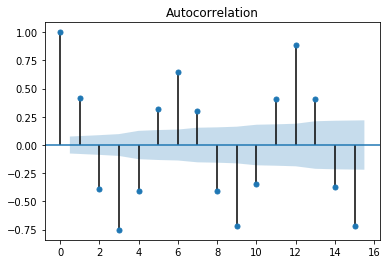

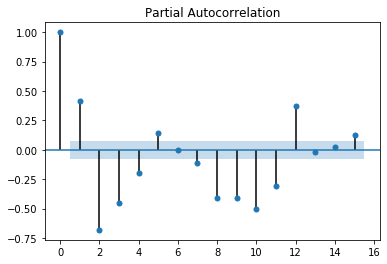

In [69]:
plot_acf(train_data['en_diff'].dropna(), lags=15)
plot_pacf(train_data['en_diff'].dropna(), lags=15)
plt.show()

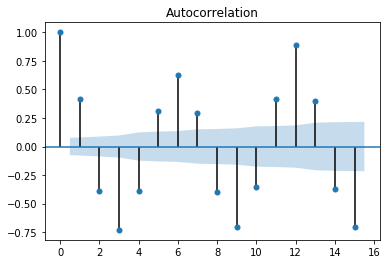

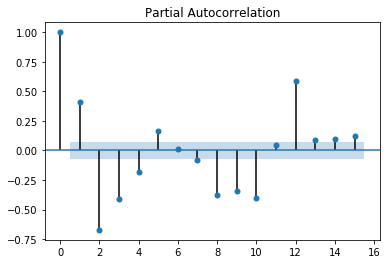

In [70]:
plot_acf(train_data['en_log_diff'].dropna(), lags=15)
plot_pacf(train_data['en_log_diff'].dropna(), lags=15)
plt.show()

p value is the lag value where the PACF chart crosses the confidence interval for the first time.

q value is the lag value where the ACF chart crosses the confidence interval for the first time.

Now we will make the ARIMA model as we have the p,q values.

# ARIMA

In [71]:
from statsmodels.tsa.arima_model import ARIMA

In [72]:
# fit model
# p=3, q=2
model = ARIMA(train_data['en_log'], order=(3,1,2)) 
model_fit = model.fit()

C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [73]:
valid_data.shape

(291, 5)

In [74]:
# gernerate forecasts
output = model_fit.forecast(291) 

valid_data['Arima'] = (pd.DataFrame(output[0])).values

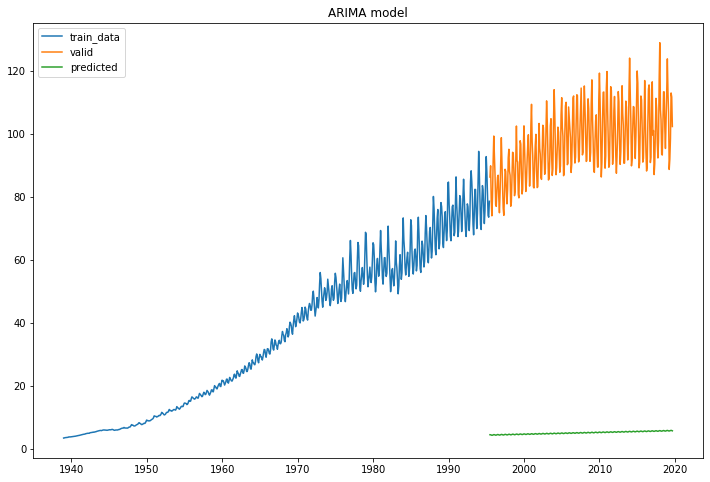

In [75]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index, valid_data['Arima'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

In [76]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Arima']))
print('The RMSE value for ARIMA is', rmse)

The RMSE value for ARIMA is 92.9933182750509


In [77]:
# fit model
# p=3, q=2
model = ARIMA(train_data['en_diff'], order=(2,1,2)) 
output = model_fit.forecast(291) 

valid_data['Arima'] = (pd.DataFrame(output[0])).values

C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


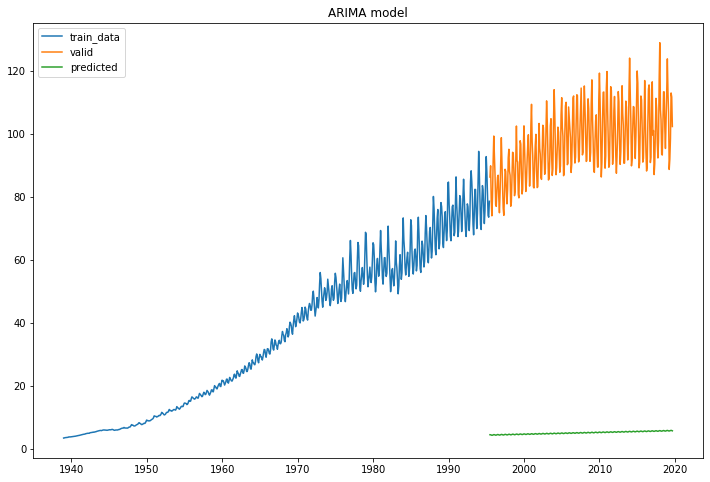

In [78]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index, valid_data['Arima'], label='predicted')

plt.legend(loc='best')
plt.title("ARIMA model")
plt.show()

# SARIMA

In [79]:
from statsmodels.tsa.statespace import sarimax

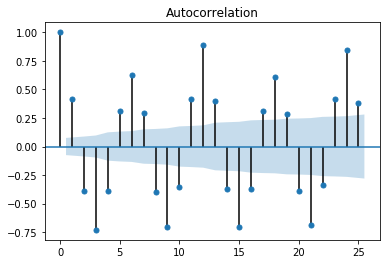

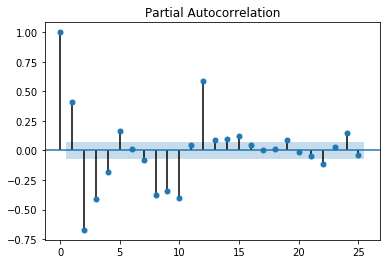

In [80]:
plot_acf(train_data['en_log_diff'].dropna(), lags=25)
plot_pacf(train_data['en_log_diff'].dropna(), lags=25)
plt.show()

In [81]:
train_data['en_log_diff'] = train_data['en_log'] - train_data['en_log'].shift(3)

In [82]:
train_data['en_log_diff'].head(10)

DATE
1939-01-01         NaN
1939-02-01         NaN
1939-03-01         NaN
1939-04-01    0.037438
1939-05-01    0.029843
1939-06-01    0.021979
1939-07-01    0.014608
1939-08-01    0.029006
1939-09-01    0.042560
1939-10-01    0.042560
Name: en_log_diff, dtype: float64

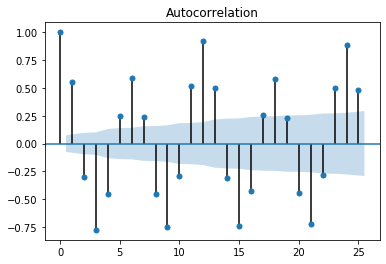

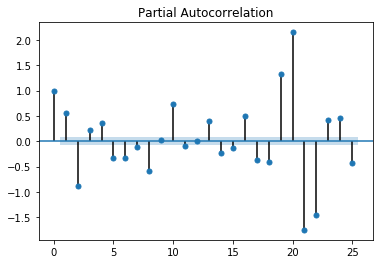

In [83]:
plot_acf(train_data['en_log_diff'].dropna(), lags=25)
plot_pacf(train_data['en_log_diff'].dropna(), lags=25)
plt.show()

In [84]:
valid_data.head()

,DATE,ENERGY_INDEX,SES,Holt_linear,Holt_Winter,Arima
DATE,,,,,,
1995-07-01,1995-07-01,86.2425,77.340496,77.426493,83.169406,4.435529
1995-08-01,1995-08-01,89.8063,77.340496,77.487085,86.651524,4.417329
1995-09-01,1995-09-01,78.7442,77.340496,77.547677,81.081323,4.328456
1995-10-01,1995-10-01,73.9353,77.340496,77.608269,77.595262,4.262342
1995-11-01,1995-11-01,79.8903,77.340496,77.668861,73.331171,4.290033


In [85]:
valid_data.tail()

,DATE,ENERGY_INDEX,SES,Holt_linear,Holt_Winter,Arima
DATE,,,,,,
2019-05-01,2019-05-01,91.9046,77.340496,94.755768,111.993375,5.681097
2019-06-01,2019-06-01,98.4397,77.340496,94.816360,117.437018,5.782453
2019-07-01,2019-07-01,112.9469,77.340496,94.876952,120.919136,5.822483
2019-08-01,2019-08-01,111.6645,77.340496,94.937543,115.348935,5.765871
2019-09-01,2019-09-01,102.2911,77.340496,94.998135,111.862875,5.674201


In [86]:
# fit model
model = sarimax.SARIMAX(train_data['en_log'], seasonal_order=(1,1,1,3), order=(1,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="1995-07-01", end="2019-09-01", dynamic=True)

C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [87]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

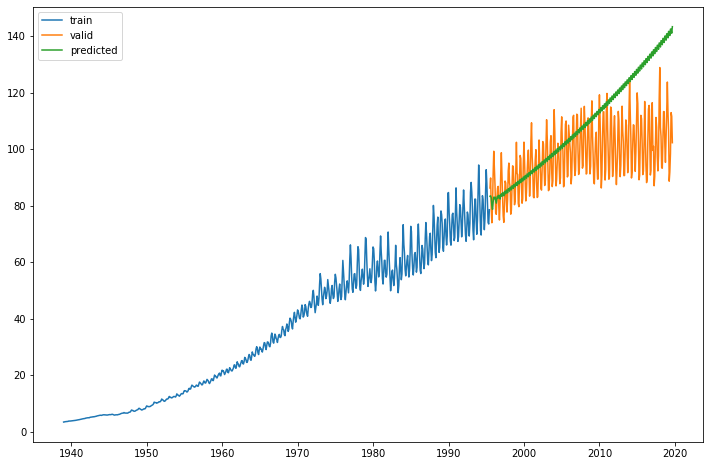

In [88]:
plt.figure(figsize=(12,8))

plt.plot(train_data['ENERGY_INDEX'],  label='train') 
plt.plot(valid_data['ENERGY_INDEX'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [89]:
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 18.894518123842364
